In [1]:
import sys
import os
sys.path.append('../dags')

from database import create_database_engine


# 환경 변수 설정
os.environ["POSTGRES_USER"] = "airflow"
os.environ["POSTGRES_PASSWORD"] = "airflow"
os.environ["POSTGRES_DB"] = "events"
os.environ["POSTGRES_PORT"] = "5433"

engine = create_database_engine(host="127.0.0.1")
print("Successfully connected to the database")

Successfully connected to the database


In [2]:
import pandas as pd
from datetime import datetime
table = "kind"
# 날짜 범위 설정
start_date = datetime(2021, 1, 1)
end_date = datetime(2022, 6, 30)

query = f"""SELECT * FROM {table}
WHERE stock_code != ''
  AND market IN ('KOSPI', 'KOSDAQ', 'KOSDAQ GLOBAL')
  AND disclosed_at >= %(start_date)s
  AND disclosed_at <= %(end_date)s
  AND label is not NULL
ORDER BY disclosed_at ASC"""

df = pd.read_sql(query, engine, params={"start_date": start_date, "end_date": end_date})
print(f"데이터베이스에서 조회된 공시 이벤트 수: {len(df)}")
df.head()


DETAIL:  The database was created using collation version 2.36, but the operating system provides version 2.41.
HINT:  Rebuild all objects in this database that use the default collation and run ALTER DATABASE events REFRESH COLLATION VERSION, or build PostgreSQL with the right library version.


데이터베이스에서 조회된 공시 이벤트 수: 13230


,id,disclosure_id,disclosed_at,company_name,stock_code,short_code,market,title,summary_kr,raw,detail_url,created_at,updated_at,is_modify,disclosure_type,dart_unique_id,masked,label
0,157471,20210104000042,2021-01-04 08:40:00,디모아,KR7016670002,016670,KOSDAQ,영업정지,디모아는 2021년 1월 1일부터 어도비시스템즈의 국내 총판권에 대한 영업정지를 받...,영업정지 정보\n====================\n회사명: 디모아\n법인구분:...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.081166,2025-10-17 04:09:46.256941,0,영업정지,00125725,회사 A는 2021년 1월 1일부터 회사 B의 국내 총판권에 대한 영업정지를 받고 ...,0
1,157469,20210104000057,2021-01-04 09:18:00,두산퓨얼셀,KR7336260005,336260,KOSPI,단일판매ㆍ공급계약체결,이 보고서는 2020년 12월 31일에 체결된 국내 연료전지 시스템 공급 계약에 관...,1. 판매ㆍ공급계약 구분: 기타 판매ㆍ공급계약\n- 체결계약명: 연료전지 시스템 공...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.080484,2025-10-17 04:09:46.256941,0,단일판매ㆍ공급계약체결,01412725,이 보고서는 2020년 12월 31일에 체결된 국내 연료전지 시스템 공급 계약에 관...,0
2,157467,20210104000059,2021-01-04 09:30:00,인텍플러스,KR7064290000,064290,KOSDAQ,단일판매ㆍ공급계약체결(자율공시),이 회사는 대만의 TAKEWIN INTERNATIONAL과 2020년 12월에 비메...,1. 판매ㆍ공급계약 내용: 비메모리용 Substrate 검사 장비\n2. 계약내역\...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.079747,2025-10-17 04:09:46.256941,0,단일판매ㆍ공급계약체결,00479787,이 회사는 대만의 회사 A과 2020년 12월에 비메모리용 Substrate 검사 ...,0
3,157459,20210104000088,2021-01-04 10:08:00,제이엘케이,KR7322510009,322510,KOSDAQ,단일판매ㆍ공급계약체결,이 기업은 인공지능 기반 캡슐내시경 소프트웨어 개발 및 공급계약을 주식회사 인트로메...,1. 판매ㆍ공급계약 내용: 인공지능(Ai)기반 캡슐내시경 소프트웨어 기술개발 공급 ...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.076901,2025-10-17 04:09:46.256941,0,단일판매ㆍ공급계약체결,01153293,이 기업은 인공지능 기반 캡슐내시경 소프트웨어 개발 및 공급계약을 주식회사 A와 체...,1
4,157460,20210104000073,2021-01-04 10:08:00,에코바이오,KR7038870002,038870,KOSDAQ,단일판매ㆍ공급계약체결,이 계약은 수도권매립지관리공사와 체결한 50MW 발전 및 부대시설 위탁관리운영 계약...,1. 판매ㆍ공급계약 내용: 50MW 발전 및 부대시설 위탁관리운영\n2. 계약내역\...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.077292,2025-10-17 04:09:46.256941,0,단일판매ㆍ공급계약체결,00287812,이 계약은 수도권매립지관리공사와 체결한 50MW 발전 및 부대시설 위탁관리운영 계약...,0


시장별 공시 분포:
market
KOSPI     5218
KOSDAQ    8012
Name: count, dtype: int64

총 공시 건수: 13230

시장별 비율:
KOSPI: 5218건 (39.4%)
KOSDAQ: 8012건 (60.6%)


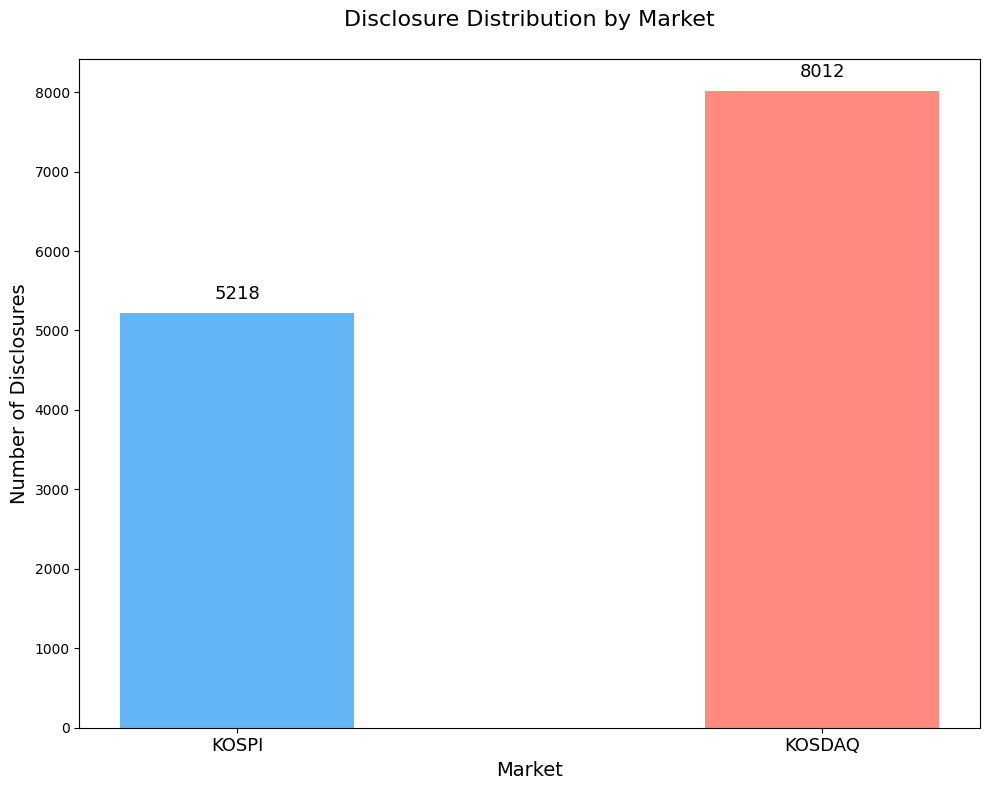

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 시장 순서를 KOSPI, KOSDAQ(및 GLOBAL)로 정렬
market_order = ['KOSPI', 'KOSDAQ', 'KOSDAQ GLOBAL']
# Series를 위 순서로 재정렬(존재하는 시장만)
market_counts = df['market'].value_counts()
ordered_markets = [m for m in market_order if m in market_counts.index]
market_counts = market_counts.loc[ordered_markets]

print("시장별 공시 분포:")
print(market_counts)
print(f"\n총 공시 건수: {len(df)}")
print("\n시장별 비율:")
for market, count in market_counts.items():
    ratio = count / len(df) * 100
    print(f"{market}: {count}건 ({ratio:.1f}%)")

# 시각화 (figure 세로길이 더 길게, 비율(pie) figure 제거)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))

# 색깔을 더 연하게, bar를 얇게 설정
color_map = {
    'KOSPI': '#64b5f6',        # 연한 파란색
    'KOSDAQ': '#ff8a80',       # 연한 빨간색
    'KOSDAQ GLOBAL': '#ffd180' # 연한 주황색
}
bar_colors = [color_map[m] for m in market_counts.index]

bar_width = 0.4  # bar 두께를 얇게 지정

# 직접 bar plot (pandas plot 대신 matplotlib 사용)
bars = ax1.bar(
    x=range(len(market_counts)),
    height=market_counts.values,
    color=bar_colors,
    width=bar_width
)

ax1.set_xticks(range(len(market_counts)))
ax1.set_xticklabels(market_counts.index, fontsize=13)
ax1.set_title('Disclosure Distribution by Market', fontsize=16, pad=24)
ax1.set_xlabel('Market', fontsize=14)
ax1.set_ylabel('Number of Disclosures', fontsize=14)
ax1.tick_params(axis='x', rotation=0)  # 회전 없이 일자

# 각 막대 위에 값 표시
for i, v in enumerate(market_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=13)

plt.tight_layout()
plt.show()


공시 발표 시간대별 분포 (KST 기준):
market_session
After Hours      7856
Trading Hours    5374
Name: count, dtype: int64

장중 비율: 40.6%
장외 비율: 59.4%


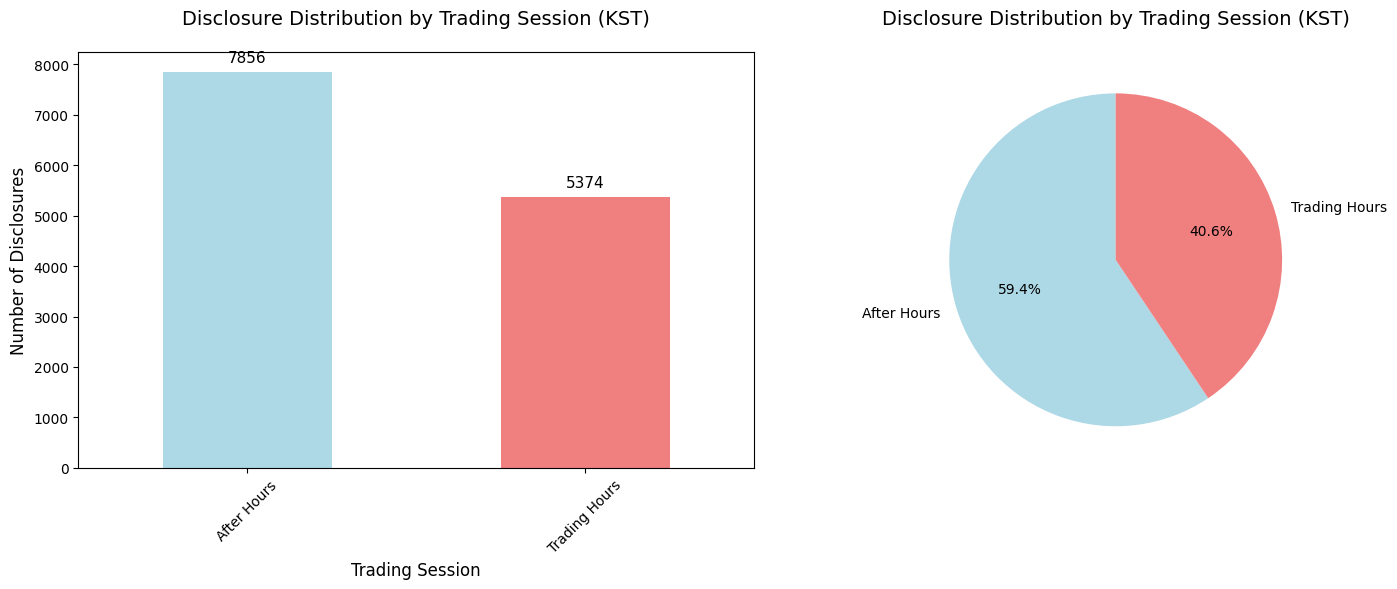

<Figure size 640x480 with 0 Axes>

In [4]:
# disclosed_at을 datetime으로 변환 (이미 KST 기준으로 저장됨)
df['disclosed_at'] = pd.to_datetime(df['disclosed_at'])

# 이미 KST 기준이므로 그대로 사용
df['disclosed_at_kst'] = df['disclosed_at']
df = df.sort_values('disclosed_at_kst')
df['time_only'] = df['disclosed_at_kst'].dt.time

# 장중 시간 정의 (9:00 ~ 15:20) - KST 기준
import datetime
market_open = datetime.time(9, 0)
market_close = datetime.time(15, 20)

# 장중/장외 분류
df['market_session'] = df['time_only'].apply(
    lambda x: 'Trading Hours' if market_open <= x <= market_close else 'After Hours'
)

# 결과 집계
session_counts = df['market_session'].value_counts()
print("공시 발표 시간대별 분포 (KST 기준):")
print(session_counts)
print(f"\n장중 비율: {session_counts.get('Trading Hours', 0) / len(df) * 100:.1f}%")
print(f"장외 비율: {session_counts.get('After Hours', 0) / len(df) * 100:.1f}%")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
session_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Disclosure Distribution by Trading Session (KST)', fontsize=14, pad=20)
ax1.set_xlabel('Trading Session', fontsize=12)
ax1.set_ylabel('Number of Disclosures', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(session_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=11)

# 파이 차트
session_ratios = session_counts / len(df) * 100
ax2.pie(session_ratios.values, labels=session_ratios.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Disclosure Distribution by Trading Session (KST)', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from datetime import datetime

TABLE = "abnormal_return_kind_log"
# abnormal return 컬럼
abn_return_cols = (
    [f"abn_ret_minus_{i}m" for i in range(59, 0, -1)] +
    ["abn_ret_0m"] +
    [f"abn_ret_{i}m" for i in range(1, 61)]
)

# abn_return_cols를 쿼리 내에서 컬럼명 문자열로 변환
abn_return_col_str = ",\n    ".join(abn_return_cols)

query = f"""
SELECT ar.event_id,
    ar.event_ts,
    {abn_return_col_str},
    k.company_name,
    k.disclosure_type,
    k.masked,
    k.label
FROM {TABLE} ar
JOIN "kind" k ON ar.event_id = k.id
WHERE k.disclosed_at >= '{start_date.strftime('%Y-%m-%d')}'
  AND k.disclosed_at <= '{end_date.strftime('%Y-%m-%d')}'
ORDER BY k.disclosed_at ASC
"""

target_df = pd.read_sql(query, engine)
target_df

,event_id,event_ts,abn_ret_minus_59m,abn_ret_minus_58m,abn_ret_minus_57m,abn_ret_minus_56m,abn_ret_minus_55m,abn_ret_minus_54m,abn_ret_minus_53m,abn_ret_minus_52m,...,abn_ret_55m,abn_ret_56m,abn_ret_57m,abn_ret_58m,abn_ret_59m,abn_ret_60m,company_name,disclosure_type,masked,label
0,157461,2021-01-04 10:08:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000981,-0.002043,0.002370,-0.000327,0.000616,-0.000982,에코바이오,단일판매ㆍ공급계약체결,"이 계약은 회사 A와 체결한 수도권매립지 제1,2매립장 유지관리 용역으로, 1차년도...",0
1,157459,2021-01-04 10:08:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000981,0.000000,-0.004539,-0.000327,0.006503,-0.005849,제이엘케이,단일판매ㆍ공급계약체결,이 기업은 인공지능 기반 캡슐내시경 소프트웨어 개발 및 공급계약을 주식회사 A와 체...,1
2,157460,2021-01-04 10:08:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000981,-0.002043,0.002370,-0.000327,0.000616,-0.000982,에코바이오,단일판매ㆍ공급계약체결,이 계약은 수도권매립지관리공사와 체결한 50MW 발전 및 부대시설 위탁관리운영 계약...,0
3,157457,2021-01-04 10:14:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.004989,0.001311,-0.002462,0.000328,0.000085,0.004667,엠아이텍,품목허가 승인,회사 A HANAROSTENT Trachea/Bronchium (CCC) 스텐트가 ...,1
4,157455,2021-01-04 10:16:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000124,0.000373,-0.000995,-0.000373,0.000000,-0.003549,한화시스템,단일판매ㆍ공급계약체결,이 회사 A는 2020년 12월 31일 국방과학연구소와 방위산업 보안을 위해 완성형...,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,23319,2022-06-29 14:04:00+00:00,0.004396,-0.004396,0.008295,-0.004376,0.000795,-0.000318,-0.000318,-0.004713,...,-0.000159,0.000635,-0.009132,0.000000,0.004577,-0.003941,SK바이오사이언스,품목허가 승인,회사 A(GBP510)은 SARS-CoV-2 감염 예방을 위해 개발된 재조합 단백질...,1
5068,23317,2022-06-29 14:20:00+00:00,-0.001768,0.000000,-0.000159,0.000477,-0.000318,0.002245,-0.001291,0.000159,...,0.000318,0.003693,-0.000159,0.001921,-0.004977,0.000000,코람코더원리츠,매출액변동,"이번 재무제표는 개별 재무상태를 나타내며, 매출액이 50% 증가하여 6,835,94...",1
5069,23316,2022-06-29 14:21:00+00:00,-0.001219,-0.000159,0.000477,-0.000318,-0.000743,0.000477,-0.001063,0.001965,...,-0.001060,0.001060,0.000159,0.000318,0.000000,NaN,DL이앤씨,단일판매ㆍ공급계약체결,"이 회사는 서울특별시 영등포구 여의도동에서 복합시설 신축공사를 수주했으며, 계약금액...",1
5070,23309,2022-06-29 14:35:00+00:00,-0.000635,-0.000962,0.001914,0.000801,-0.001277,0.001594,-0.000476,-0.000159,...,NaN,NaN,NaN,NaN,NaN,NaN,DL,단일판매ㆍ공급계약체결,"이 기업은 서울특별시 영등포구 여의도동의 복합시설 신축공사를 수주했으며, 계약금액은...",1


In [6]:
for m in range(1, 11):
    plus_cols = [
        f"abn_ret_minus_{abs(i)}m" if i < 0 else f"abn_ret_{i}m"
        for i in range(-m+1, m + 1)
    ]
    target_df[f"CAR_{m}m"] = target_df[plus_cols].sum(axis=1)
    



In [7]:
for m in range(10, 61, 10):
    plus_cols = [
        f"abn_ret_minus_{abs(i)}m" if i < 0 else f"abn_ret_{i}m"
        for i in range(-m+1, m + 1)
    ]
    target_df[f"CAR_{m}m"] = target_df[plus_cols].sum(axis=1)
    



In [8]:
print("\n=== 기본 데이터 분석 ===")

# 컬럼 정보
print(f"컬럼 수: {len(target_df.columns)}")
print(f"컬럼명: {list(target_df.columns)}")

# 데이터 타입
print("\n데이터 타입:")
print(target_df.dtypes)

# 결측값 확인
print("\n결측값 현황:")
print(target_df.isnull().sum())


=== 기본 데이터 분석 ===
컬럼 수: 141
컬럼명: ['event_id', 'event_ts', 'abn_ret_minus_59m', 'abn_ret_minus_58m', 'abn_ret_minus_57m', 'abn_ret_minus_56m', 'abn_ret_minus_55m', 'abn_ret_minus_54m', 'abn_ret_minus_53m', 'abn_ret_minus_52m', 'abn_ret_minus_51m', 'abn_ret_minus_50m', 'abn_ret_minus_49m', 'abn_ret_minus_48m', 'abn_ret_minus_47m', 'abn_ret_minus_46m', 'abn_ret_minus_45m', 'abn_ret_minus_44m', 'abn_ret_minus_43m', 'abn_ret_minus_42m', 'abn_ret_minus_41m', 'abn_ret_minus_40m', 'abn_ret_minus_39m', 'abn_ret_minus_38m', 'abn_ret_minus_37m', 'abn_ret_minus_36m', 'abn_ret_minus_35m', 'abn_ret_minus_34m', 'abn_ret_minus_33m', 'abn_ret_minus_32m', 'abn_ret_minus_31m', 'abn_ret_minus_30m', 'abn_ret_minus_29m', 'abn_ret_minus_28m', 'abn_ret_minus_27m', 'abn_ret_minus_26m', 'abn_ret_minus_25m', 'abn_ret_minus_24m', 'abn_ret_minus_23m', 'abn_ret_minus_22m', 'abn_ret_minus_21m', 'abn_ret_minus_20m', 'abn_ret_minus_19m', 'abn_ret_minus_18m', 'abn_ret_minus_17m', 'abn_ret_minus_16m', 'abn_ret_minus_15

In [9]:
car_cols = [f'CAR_{m}m' for m in range(10, 61, 10)]
target_df[car_cols].describe().round(4)


,CAR_10m,CAR_20m,CAR_30m,CAR_40m,CAR_50m,CAR_60m
count,5072.0000,5072.0000,5072.0000,5072.0000,5072.0000,5072.0000
mean,0.0073,0.0070,0.0071,0.0088,0.0084,0.0083
std,0.0215,0.0236,0.0252,0.0309,0.0318,0.0319
min,-0.3983,-0.4897,-0.5093,-0.5040,-0.5069,-0.5090
25%,-0.0008,-0.0016,-0.0022,-0.0025,-0.0029,-0.0034
50%,0.0043,0.0042,0.0041,0.0045,0.0044,0.0046
75%,0.0124,0.0129,0.0135,0.0146,0.0149,0.0153
max,0.2614,0.2647,0.2698,0.2763,0.2956,0.3016


In [10]:
car_cols = [f'CAR_{m}m' for m in range(1, 11)]
target_df[car_cols].describe().round(4)


,CAR_1m,CAR_2m,CAR_3m,CAR_4m,CAR_5m,CAR_6m,CAR_7m,CAR_8m,CAR_9m,CAR_10m
count,5072.0000,5072.0000,5072.0000,5072.0000,5072.0000,5072.0000,5072.0000,5072.0000,5072.0000,5072.0000
mean,0.0099,0.0099,0.0092,0.0087,0.0082,0.0079,0.0078,0.0076,0.0075,0.0073
std,0.0187,0.0204,0.0208,0.0208,0.0208,0.0210,0.0211,0.0215,0.0215,0.0215
min,-0.1272,-0.1236,-0.1926,-0.1263,-0.2151,-0.3282,-0.3209,-0.3601,-0.3570,-0.3983
25%,0.0003,0.0004,0.0003,0.0000,-0.0000,-0.0002,-0.0003,-0.0005,-0.0007,-0.0008
50%,0.0049,0.0050,0.0050,0.0048,0.0047,0.0045,0.0045,0.0042,0.0044,0.0043
75%,0.0125,0.0126,0.0124,0.0120,0.0119,0.0118,0.0120,0.0121,0.0123,0.0124
max,0.1698,0.2408,0.2678,0.2675,0.2647,0.2796,0.2721,0.2617,0.2678,0.2614


In [11]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5072 entries, 0 to 5071
Columns: 141 entries, event_id to CAR_60m
dtypes: datetime64[ns, UTC](1), float64(135), int64(2), object(3)
memory usage: 5.5+ MB


In [12]:
ret_columns = [
    "abn_ret_minus_10m", "abn_ret_minus_20m", "abn_ret_minus_30m", 
    "abn_ret_minus_40m", "abn_ret_minus_50m", "abn_ret_minus_60m",
    "abn_ret_10m", "abn_ret_20m", "abn_ret_30m", 
    "abn_ret_40m", "abn_ret_50m", "abn_ret_60m"
]

In [13]:
target_df['disclosure_type'].value_counts()

disclosure_type
단일판매ㆍ공급계약체결           1838
매출액변동                 1354
특허권취득                  378
타법인 주식 및 출자증권 양수결정     278
자기주식취득 신탁계약 체결 결정      192
자기주식 처분 결정             112
자기주식 취득 결정             108
신규시설투자                 106
무상증자 결정                101
전환사채권 발행결정              70
유상증자 결정                 56
유형자산 양수 결정              55
타법인 주식 및 출자증권 양도결정      53
자기주식취득 신탁계약 해지 결정       48
유형자산 양도 결정              45
임상 계획 신청                42
임상 계획 승인                40
자기주식 소각 결정              30
회사합병 결정                 27
생산중단                    23
단일판매ㆍ공급계약해지             18
품목허가 승인                 18
주권 관련 사채권 양수 결정         17
임상 계획 결과 발표             11
교환사채권 발행결정              10
회사분할 결정                  9
기술이전계약체결                 6
품목허가 신청                  5
임상 계획 철회                 4
영업정지                     4
품목허가 철회                  3
소송 등의 제기                 3
자산양수도(기타), 풋백옵션          2
주권 관련 사채권 양도 결정          2
기술이전계약해지                 1
감자 결정                    1
영업양수 결정     

In [14]:
# config.py의 keywords 딕셔너리를 사용해서 한글-영어 카테고리 매핑 생성
category_mapping = {
    # 임상 관련
    "임상 계획 철회": "Clinical Trial Withdrawal",
    "임상 계획 신청": "Clinical Trial Application", 
    "임상 계획 승인": "Clinical Trial Approval",
    "임상 계획 결과 발표": "Clinical Trial Results",
    
    # 자산 관련
    "자산양수도(기타), 풋백옵션": "Asset Transfer & Putback Option",
    
    # 경영 관련
    "부도발생": "Default Occurrence",
    "영업정지": "Business Suspension", 
    "회생절차 개시신청": "Rehabilitation Procedure Initiation",
    "해산사유 발생": "Dissolution Cause Occurrence",
    
    # 자본 변동
    "유상증자 결정": "Paid-in Capital Increase Decision",
    "무상증자 결정": "Free Capital Increase Decision", 
    "유무상증자 결정": "Paid/Free Capital Increase Decision",
    "감자 결정": "Capital Reduction Decision",
    "주식분할 결정": "Stock Split Decision",
    
    # 금융 관련
    "채권은행 등의 관리절차 개시": "Creditor Bank Management Procedure Initiation",
    "채권은행 등의 관리절차 중단": "Creditor Bank Management Procedure Suspension",
    
    # 소송/분쟁
    "소송 등의 제기": "Litigation Filing",
    "소송등의판결ㆍ결정": "Litigation Judgment/Decision",
    
    # 해외 상장
    "해외 증권시장 주권등 상장 결정": "Overseas Securities Market Listing Decision",
    "해외 증권시장 주권등 상장폐지 결정": "Overseas Securities Market Delisting Decision", 
    "해외 증권시장 주권등 상장": "Overseas Securities Market Listing",
    "해외 증권시장 주권등 상장폐지": "Overseas Securities Market Delisting",
    
    # 채권 발행
    "전환사채권 발행결정": "Convertible Bond Issuance Decision",
    "신주인수권부사채권 발행결정": "Bond with Warrant Issuance Decision",
    "교환사채권 발행결정": "Exchangeable Bond Issuance Decision",
    "상각형 조건부자본증권 발행결정": "Contingent Convertible Security Issuance Decision",
    
    # 자사주 관련
    "자기주식 취득 결정": "Treasury Stock Acquisition Decision",
    "자기주식 처분 결정": "Treasury Stock Disposal Decision", 
    "자기주식 소각 결정": "Treasury Stock Retirement Decision",
    "자기주식취득 신탁계약 체결 결정": "Treasury Stock Acquisition Trust Contract Decision",
    "자기주식취득 신탁계약 해지 결정": "Treasury Stock Acquisition Trust Contract Termination Decision",
    
    # 영업 양수도
    "영업양수 결정": "Business Acquisition Decision",
    "영업양도 결정": "Business Transfer Decision",
    
    # 자산 취득/처분
    "유형자산 양수 결정": "Tangible Asset Acquisition Decision",
    "유형자산 양도 결정": "Tangible Asset Transfer Decision",
    "타법인 주식 및 출자증권 양수결정": "Other Corporation Stock Acquisition Decision",
    "타법인 주식 및 출자증권 양도결정": "Other Corporation Stock Transfer Decision",
    "주권 관련 사채권 양수 결정": "Stock-related Bond Acquisition Decision",
    "주권 관련 사채권 양도 결정": "Stock-related Bond Transfer Decision",
    
    # 기업 구조 변경
    "회사합병 결정": "Company Merger Decision",
    "회사분할 결정": "Company Spin-off Decision", 
    "회사분할합병 결정": "Company Split-Merger Decision",
    "주식교환ㆍ이전 결정": "Stock Exchange/Transfer Decision",
    
    # 공시 관련
    "지분공시": "Equity Disclosure",
    "실적공시": "Earnings Disclosure",
    
    # 계약 관련
    "단일판매ㆍ공급계약해지": "Single Sales/Supply Contract Termination",
    "단일판매ㆍ공급계약체결": "Single Sales/Supply Contract Execution",
    
    # 기타
    "생산중단": "Production Suspension",
    "배당": "Dividend",
    "매출액변동": "Revenue Change",
    "특허권취득": "Patent Acquisition",
    "신규시설투자": "New Facility Investment",
    "기술이전계약해지": "Technology Transfer Contract Termination",
    "기술이전계약체결": "Technology Transfer Contract Execution",
    
    # 품목허가 관련
    "품목허가 철회": "Product Approval Withdrawal",
    "품목허가 신청": "Product Approval Application",
    "품목허가 승인": "Product Approval",
    
    # 기타
    "횡령ㆍ배임혐의발생": "Embezzlement/Malfeasance Allegation",
    "공개매수": "Public Tender Offer"
}

import pandas as pd
pd.DataFrame(list(category_mapping.items()), columns=["category_kr", "category_en"])

,category_kr,category_en
0,임상 계획 철회,Clinical Trial Withdrawal
1,임상 계획 신청,Clinical Trial Application
2,임상 계획 승인,Clinical Trial Approval
3,임상 계획 결과 발표,Clinical Trial Results
4,"자산양수도(기타), 풋백옵션",Asset Transfer & Putback Option
5,부도발생,Default Occurrence
6,영업정지,Business Suspension
7,회생절차 개시신청,Rehabilitation Procedure Initiation
8,해산사유 발생,Dissolution Cause Occurrence
9,유상증자 결정,Paid-in Capital Increase Decision


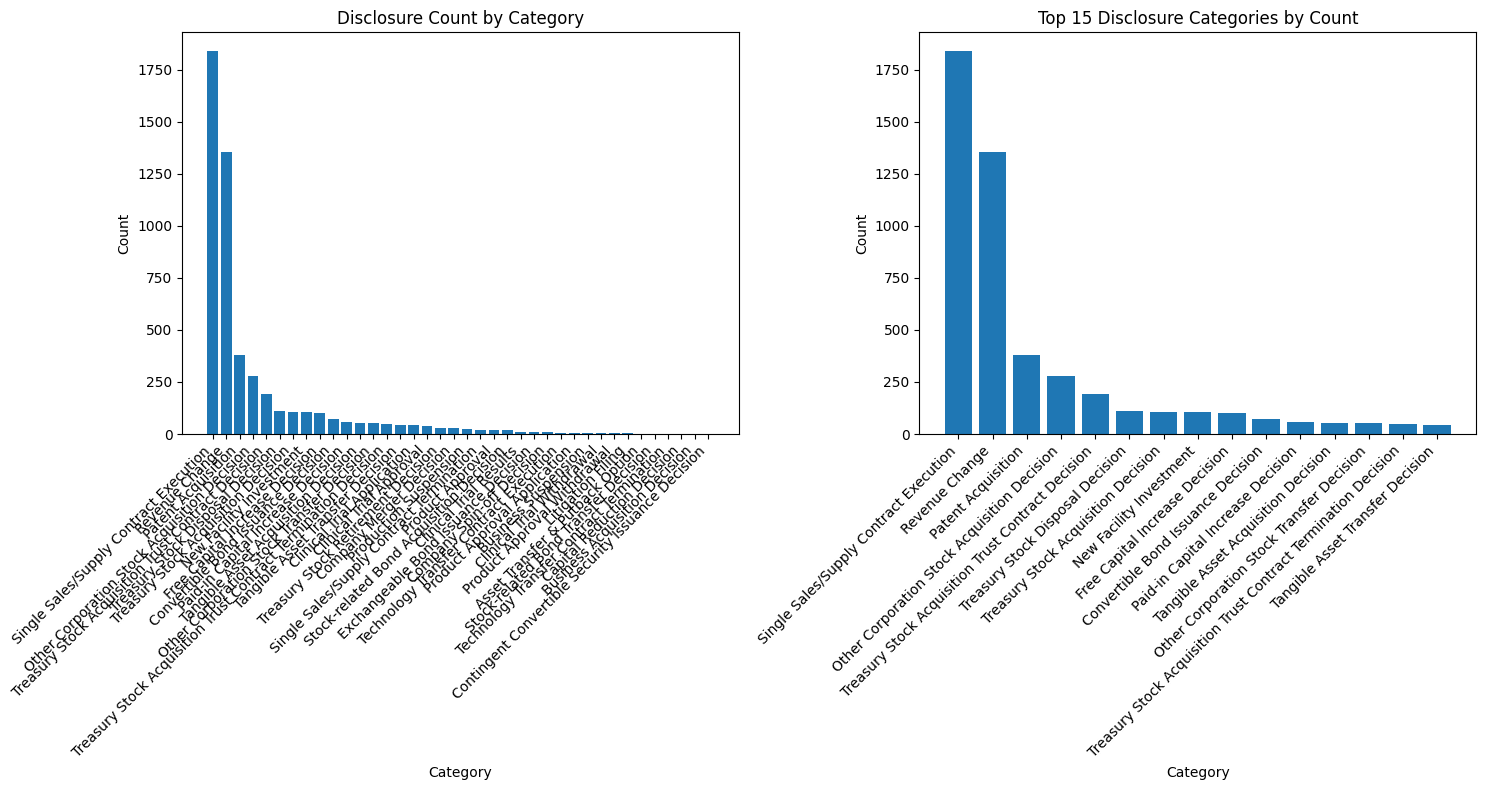

총 38개 카테고리, 총 5072건의 공시

상위 15개 카테고리:
disclosure_type
단일판매ㆍ공급계약체결           1838
매출액변동                 1354
특허권취득                  378
타법인 주식 및 출자증권 양수결정     278
자기주식취득 신탁계약 체결 결정      192
자기주식 처분 결정             112
자기주식 취득 결정             108
신규시설투자                 106
무상증자 결정                101
전환사채권 발행결정              70
유상증자 결정                 56
유형자산 양수 결정              55
타법인 주식 및 출자증권 양도결정      53
자기주식취득 신탁계약 해지 결정       48
유형자산 양도 결정              45
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from config import keywords

df_with_returns = target_df.copy()
category_counts = df_with_returns['disclosure_type'].value_counts()

# 카테고리별 건수 시각화
plt.figure(figsize=(15, 8))
category_counts_sorted = category_counts.sort_values(ascending=False)

# 한글 카테고리를 영어로 매핑
category_counts_sorted_en = category_counts_sorted.copy()
category_counts_sorted_en.index = [category_mapping.get(cat, cat) for cat in category_counts_sorted_en.index]

plt.subplot(1, 2, 1)
plt.bar(range(len(category_counts_sorted_en)), category_counts_sorted_en.values)
plt.title('Disclosure Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(category_counts_sorted_en)), category_counts_sorted_en.index, rotation=45, ha='right')

# 상위 15 카테고리만 별도 표시
plt.subplot(1, 2, 2)
top_15 = category_counts_sorted_en.head(15)
plt.bar(range(len(top_15)), top_15.values)
plt.title('Top 15 Disclosure Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(top_15)), top_15.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print(f"총 {len(category_counts)}개 카테고리, 총 {category_counts.sum()}건의 공시")
print("\n상위 15개 카테고리:")
print(category_counts_sorted.head(15))

In [16]:
df_with_returns.isnull().sum()
df_with_returns.describe()
df_with_returns.info()

df_with_returns.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5072 entries, 0 to 5071
Columns: 141 entries, event_id to CAR_60m
dtypes: datetime64[ns, UTC](1), float64(135), int64(2), object(3)
memory usage: 5.5+ MB


,event_id,event_ts,abn_ret_minus_59m,abn_ret_minus_58m,abn_ret_minus_57m,abn_ret_minus_56m,abn_ret_minus_55m,abn_ret_minus_54m,abn_ret_minus_53m,abn_ret_minus_52m,...,CAR_6m,CAR_7m,CAR_8m,CAR_9m,CAR_10m,CAR_20m,CAR_30m,CAR_40m,CAR_50m,CAR_60m
0,157461,2021-01-04 10:08:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017195,0.010830,0.005286,0.018039,0.016961,0.023220,0.021990,0.022972,0.019986,0.023341
1,157459,2021-01-04 10:08:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001975,-0.000003,0.000671,0.003952,-0.004914,0.007855,-0.000312,0.000670,0.008463,0.004906
2,157460,2021-01-04 10:08:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017195,0.010830,0.005286,0.018039,0.016961,0.023220,0.021990,0.022972,0.019986,0.023341
3,157457,2021-01-04 10:14:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.048936,0.048975,0.043475,0.041041,0.037109,0.039253,0.046965,0.025485,0.029299,0.020446
4,157455,2021-01-04 10:16:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.004744,-0.002693,-0.004713,-0.009930,-0.001911,-0.023724,-0.020824,-0.024954,-0.021079,-0.033610


In [17]:
df_with_returns['label'].value_counts()

label
 1    2655
 0    1939
-1     478
Name: count, dtype: int64

# AI Inference

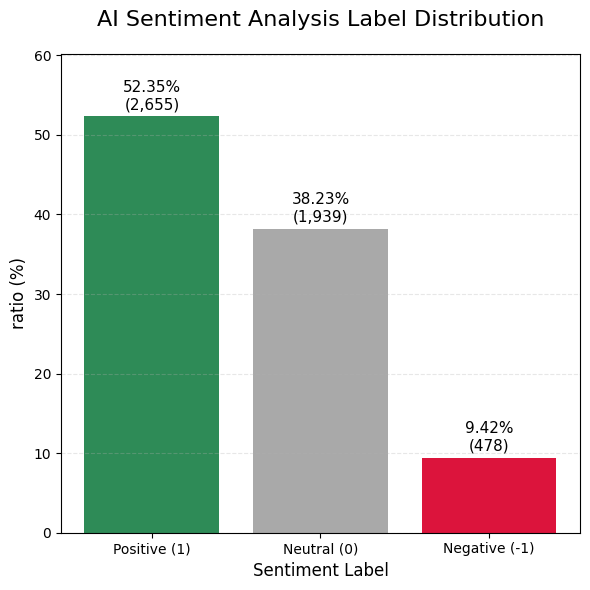

=== AI Sentiment Analysis Label Distribution ===
positive: 2,655건 (52.35%)
neutral: 1,939건 (38.23%)
negative: 478건 (9.42%)


In [18]:
# label 비율 시각화
plt.figure(figsize=(6, 6))

# label 비율 계산
label_counts = df_with_returns['label'].value_counts()
label_ratios = (label_counts / len(df_with_returns) * 100).round(2)

# 색상 매핑 (라벨 순서에 맞게)
colors = ['#2E8B57', '#A9A9A9', '#DC143C']  # 1: positive(초록), 0: neutral(회색), -1: negative(빨강)

# x축 라벨 설정: 1=Positive(초록), 0=Neutral(회색), -1=Negative(빨강)
label_order = [1, 0, -1]
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

# 막대 그래프 생성
bars = plt.bar(range(len(label_order)), [label_ratios.get(l, 0) for l in label_order], color=colors)

# 막대 위에 비율 표시
for i, label in enumerate(label_order):
    if label in label_counts:
        ratio = label_ratios[label]
        count = label_counts[label]
        plt.text(i, ratio + 0.5, f'{ratio}%\n({count:,})',
                 ha='center', va='bottom', fontsize=11)

plt.title('AI Sentiment Analysis Label Distribution', fontsize=16, pad=20)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('ratio (%)', fontsize=12)
plt.ylim(0, max(label_ratios.values) * 1.15)

plt.xticks(range(len(label_order)), label_names)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("=== AI Sentiment Analysis Label Distribution ===")
for i, label in enumerate(label_order):
    if label in label_counts:
        count = label_counts[label]
        ratio = label_ratios[label]
        print(f"{label_names[i].split()[0].lower()}: {count:,}건 ({ratio}%)")


# Event Study

## 10 minute interval

In [19]:
for m in range(-59, 61):
    cols = [
        f"abn_ret_minus_{abs(i)}m" if i < 0 else f"abn_ret_{i}m"
        for i in range(-59, m+1)
    ]

    # 만약 필요한 값 중 하나라도 NaN이면 → 전체 CAR이 NaN
    # skipna=False → NaN 있는 경우 결과 NaN
    df_with_returns[f"CAR_event_{m}"] = df_with_returns[cols].sum(axis=1, skipna=False)


/var/folders/5r/tdks4c2x5vgdpqkw390mgzqm0000gn/T/ipykernel_4755/3022879054.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_returns[f"CAR_event_{m}"] = df_with_returns[cols].sum(axis=1, skipna=False)
/var/folders/5r/tdks4c2x5vgdpqkw390mgzqm0000gn/T/ipykernel_4755/3022879054.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_returns[f"CAR_event_{m}"] = df_with_returns[cols].sum(axis=1, skipna=False)
/var/folders/5r/tdks4c2x5vgdpqkw390mgzqm0000gn/T/ipykernel_4755/3022879054.py:9: PerformanceWarning: DataFrame i

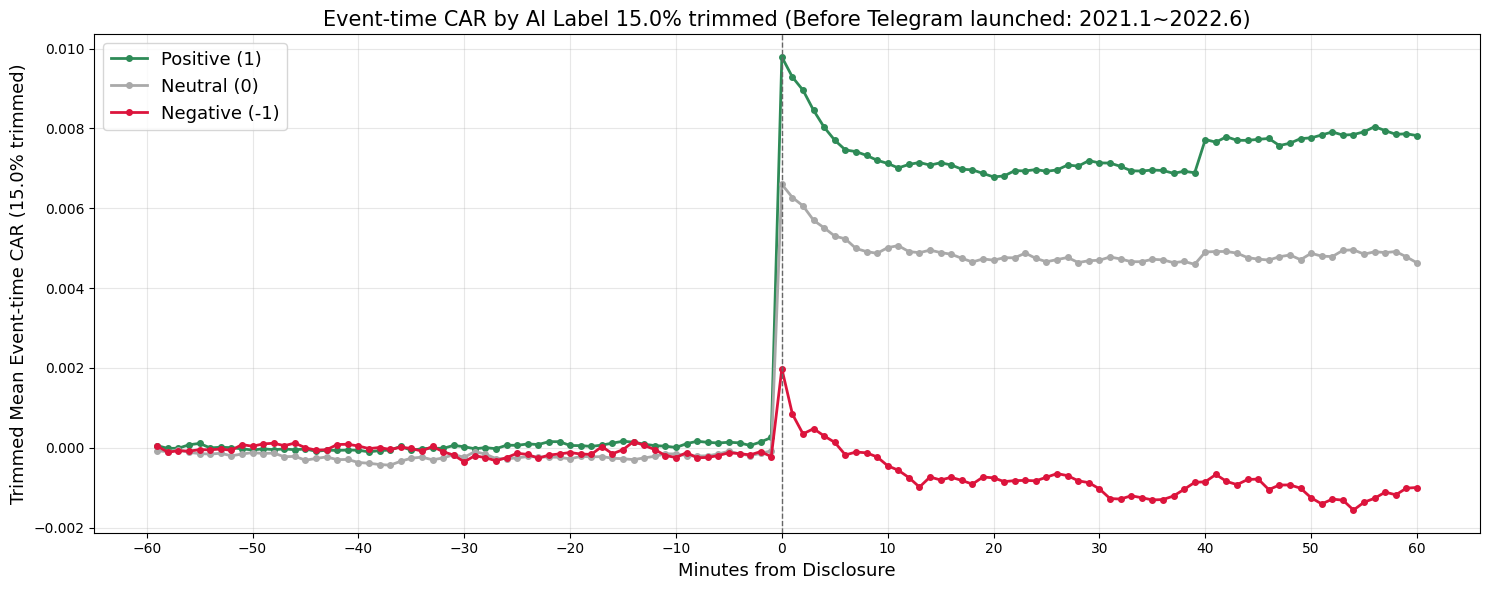

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 모든 분 포함: -60, -59, ..., 0, 1, ..., 60
ret_columns = [f"CAR_event_{m}" for m in range(-60, 61)]

label_order = [1, 0, -1]
colors = ['#2E8B57', '#A9A9A9', '#DC143C']
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

alpha = 0.15

def trimmed_mean(series, lower=alpha, upper=1-alpha):
    """위 아래 5% trim한 평균"""
    s = series.dropna()
    if len(s) == 0:
        return np.nan
    q_low, q_high = s.quantile([lower, upper])
    trimmed = s[(s >= q_low) & (s <= q_high)]
    if len(trimmed) == 0:
        return np.nan
    return trimmed.mean()

plt.figure(figsize=(15, 6))

for label, c, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]

    yvals = []
    xvals = []

    for m in range(-60, 61):
        col = f"CAR_event_{m}"
        if col not in grp.columns:
            yvals.append(np.nan)
            xvals.append(m)
            continue

        val = trimmed_mean(grp[col])
        yvals.append(val)
        xvals.append(m)

    plt.plot(
        xvals,
        yvals,
        label=name,
        color=c,
        marker='o',
        linewidth=2,
        markersize=4
    )

plt.axvline(0, color="#666", linestyle="--", lw=1)
plt.legend(fontsize=13)
plt.xticks(range(-60, 61, 10))
plt.xlabel("Minutes from Disclosure", fontsize=13)
plt.ylabel(f"Trimmed Mean Event-time CAR ({alpha*100}% trimmed)", fontsize=13)
plt.title(f"Event-time CAR by AI Label {alpha*100}% trimmed (Before Telegram launched: 2021.1~2022.6)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


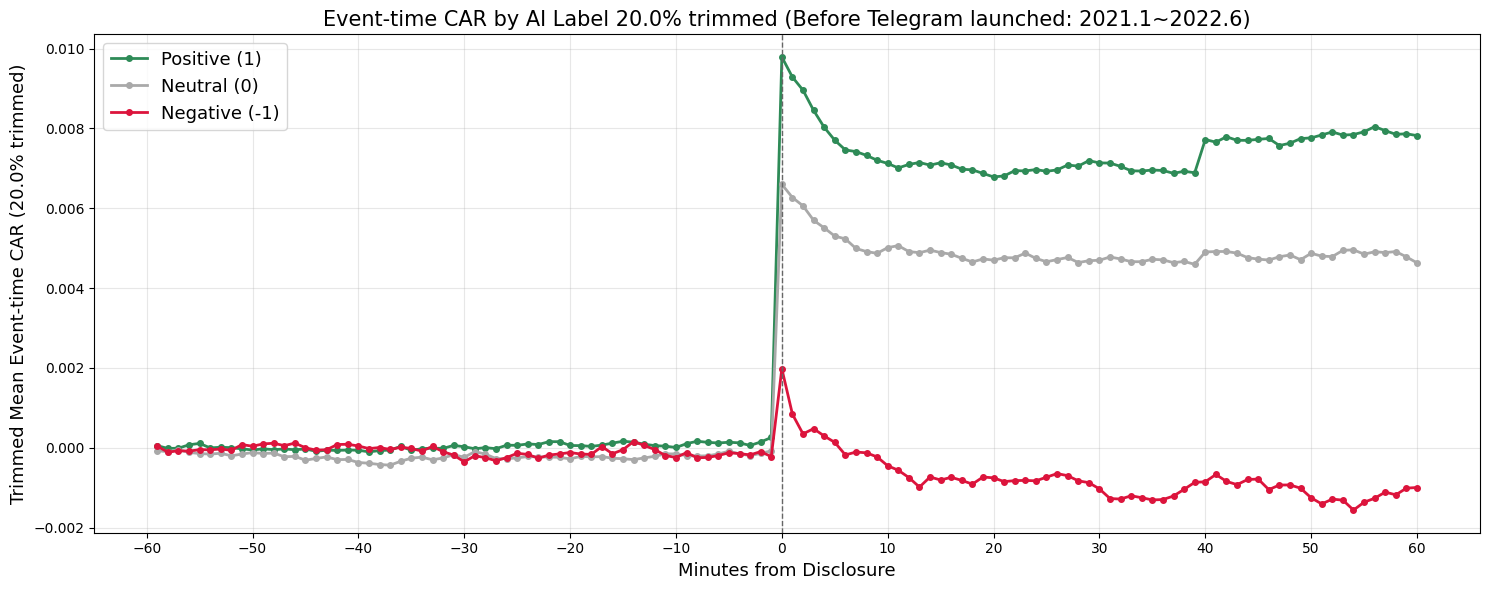

In [21]:
alpha = 0.2

plt.figure(figsize=(15, 6))

for label, c, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]

    yvals = []
    xvals = []

    for m in range(-60, 61):
        col = f"CAR_event_{m}"
        if col not in grp.columns:
            yvals.append(np.nan)
            xvals.append(m)
            continue

        val = trimmed_mean(grp[col])
        yvals.append(val)
        xvals.append(m)

    plt.plot(
        xvals,
        yvals,
        label=name,
        color=c,
        marker='o',
        linewidth=2,
        markersize=4
    )

plt.axvline(0, color="#666", linestyle="--", lw=1)
plt.legend(fontsize=13)
plt.xticks(range(-60, 61, 10))
plt.xlabel("Minutes from Disclosure", fontsize=13)
plt.ylabel(f"Trimmed Mean Event-time CAR ({alpha*100}% trimmed)", fontsize=13)
plt.title(f"Event-time CAR by AI Label {alpha*100}% trimmed (Before Telegram launched: 2021.1~2022.6)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


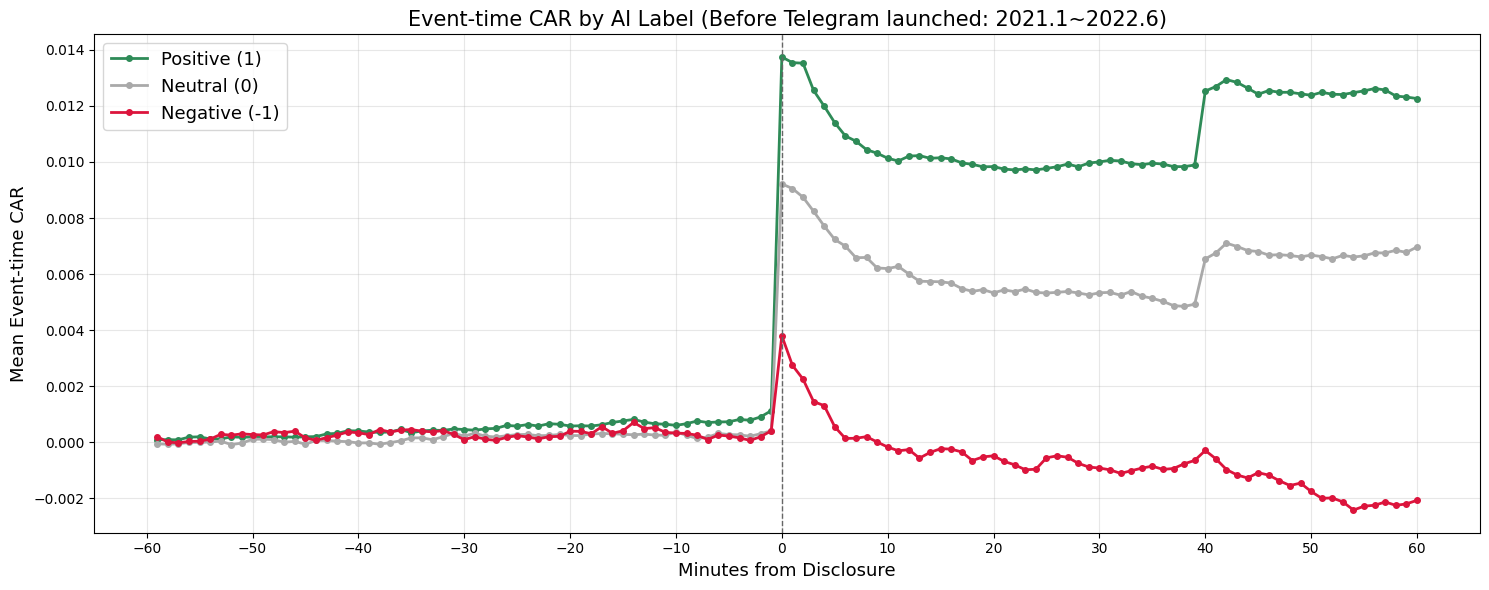

In [22]:
import matplotlib.pyplot as plt

# 모든 분 포함: -60, -59, ..., 0, 1, ..., 60
ret_columns = [f"CAR_event_{m}" for m in range(-60, 61)]

label_order = [1, 0, -1]
colors = ['#2E8B57', '#A9A9A9', '#DC143C']  # 1: positive(초록), 0: neutral(회색), -1: negative(빨강)
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

car_time_points = list(range(-60, 61))
car_time_labels = ret_columns

plt.figure(figsize=(15, 6))
for label, c, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]
    # 혹시 열이 전부 없는 경우 에러 방지: 존재하는 컬럼만 사용
    available_cols = [col for col in car_time_labels if col in grp.columns]
    if len(available_cols) == 0:
        continue
    yvals = grp[available_cols].mean()
    xvals = [int(col.replace("CAR_event_", "")) for col in available_cols]
    plt.plot(
        xvals,
        yvals.values,
        label=name,
        color=c,
        marker='o',
        linewidth=2,
        markersize=4
    )

plt.axvline(0, color="#666", linestyle="--", lw=1)
plt.legend(fontsize=13)
plt.xticks(range(-60, 61, 10))
plt.xlabel("Minutes from Disclosure", fontsize=13)
plt.ylabel("Mean Event-time CAR", fontsize=13)
plt.title("Event-time CAR by AI Label (Before Telegram launched: 2021.1~2022.6)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


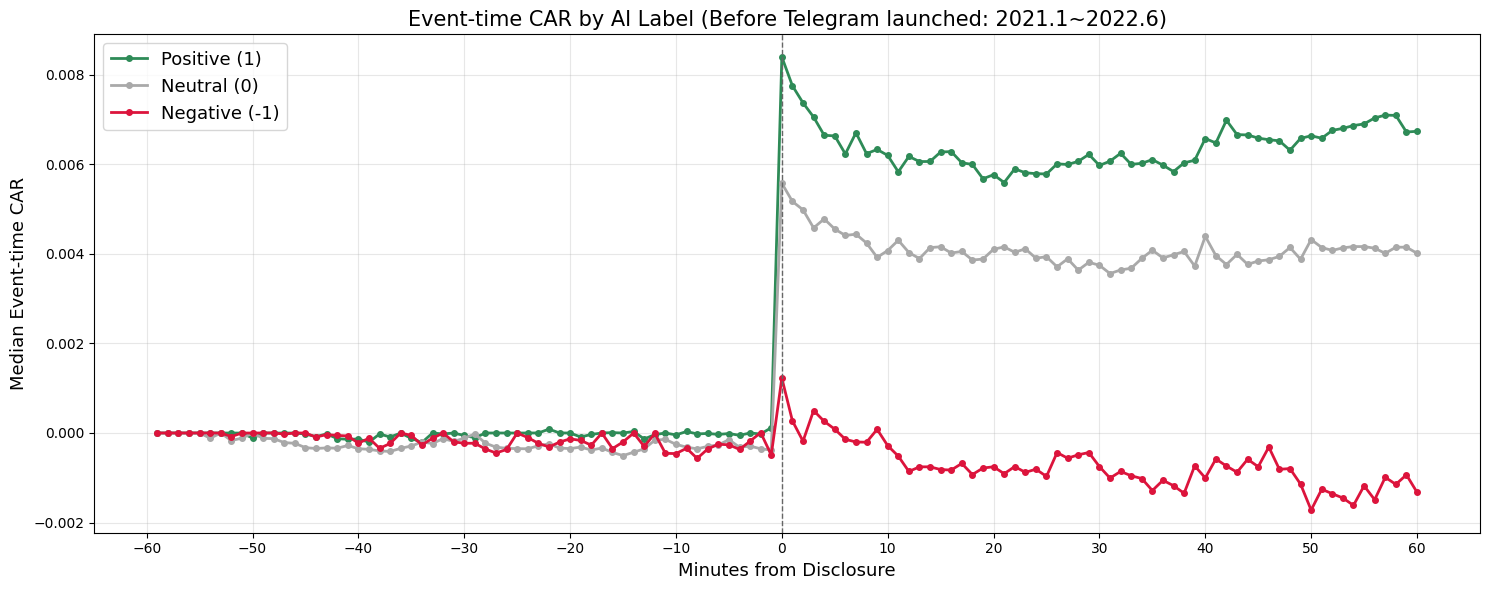

In [23]:
import matplotlib.pyplot as plt

# 모든 분 포함: -60, -59, ..., 0, 1, ..., 60
ret_columns = [f"CAR_event_{m}" for m in range(-60, 61)]

label_order = [1, 0, -1]
colors = ['#2E8B57', '#A9A9A9', '#DC143C']  # 1: positive(초록), 0: neutral(회색), -1: negative(빨강)
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

car_time_points = list(range(-60, 61))
car_time_labels = ret_columns

plt.figure(figsize=(15, 6))
for label, c, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]
    # 혹시 열이 전부 없는 경우 에러 방지: 존재하는 컬럼만 사용
    available_cols = [col for col in car_time_labels if col in grp.columns]
    if len(available_cols) == 0:
        continue
    yvals = grp[available_cols].median()
    xvals = [int(col.replace("CAR_event_", "")) for col in available_cols]
    plt.plot(
        xvals,
        yvals.values,
        label=name,
        color=c,
        marker='o',
        linewidth=2,
        markersize=4
    )

plt.axvline(0, color="#666", linestyle="--", lw=1)
plt.legend(fontsize=13)
plt.xticks(range(-60, 61, 10))
plt.xlabel("Minutes from Disclosure", fontsize=13)
plt.ylabel("Median Event-time CAR", fontsize=13)
plt.title("Event-time CAR by AI Label (Before Telegram launched: 2021.1~2022.6)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


# 공시 종류별 감성 분포

In [24]:
df_with_returns.groupby('disclosure_type')[ret_columns].mean().round(2)


KeyError: "Columns not found: 'CAR_event_-60'"

In [ ]:
df_with_returns.groupby('disclosure_type')[ret_columns].std()


,CAR_event_-60,CAR_event_-59,CAR_event_-58,CAR_event_-57,CAR_event_-56,CAR_event_-55,CAR_event_-54,CAR_event_-53,CAR_event_-52,CAR_event_-51,...,CAR_event_51,CAR_event_52,CAR_event_53,CAR_event_54,CAR_event_55,CAR_event_56,CAR_event_57,CAR_event_58,CAR_event_59,CAR_event_60
disclosure_type,,,,,,,,,,,,,,,,,,,,,
감자 결정,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
교환사채권 발행결정,0.0,0.002519,0.001925,0.001674,0.000676,0.003576,0.003874,0.004571,0.005295,0.006201,...,0.099275,0.097926,0.097469,0.102112,0.100653,0.102408,0.103022,0.113045,0.111610,0.111085
기술이전계약체결,0.0,0.009309,0.009658,0.008733,0.012473,0.003269,0.010307,0.005784,0.008712,0.009996,...,0.082826,0.082744,0.084785,0.081703,0.081369,0.082851,0.080350,0.082083,0.085554,0.081109
단일판매ㆍ공급계약체결,0.0,0.002649,0.003395,0.003959,0.004146,0.004485,0.005043,0.005256,0.005352,0.005637,...,0.026322,0.026281,0.026410,0.026309,0.026610,0.026287,0.026155,0.026205,0.026297,0.026141
단일판매ㆍ공급계약해지,0.0,0.001429,0.001464,0.001964,0.001565,0.001893,0.001795,0.001696,0.001635,0.001615,...,0.005322,0.005538,0.004913,0.006123,0.004289,0.004502,0.004863,0.003342,0.003581,0.004369
매출액변동,0.0,0.002524,0.003284,0.003833,0.004286,0.004796,0.004827,0.005596,0.005547,0.006310,...,0.025805,0.025841,0.025543,0.025979,0.026110,0.025940,0.027021,0.026829,0.026312,0.026885
무상증자 결정,0.0,0.002949,0.003554,0.003995,0.004812,0.005381,0.005619,0.006531,0.006864,0.007380,...,0.091603,0.093246,0.093252,0.092701,0.094697,0.096175,0.095693,0.096193,0.095667,0.096078
생산중단,0.0,0.001737,0.003243,0.002997,0.002907,0.002968,0.002764,0.003015,0.003673,0.003522,...,0.013976,0.013739,0.013645,0.013420,0.014052,0.014048,0.014476,0.013769,0.013561,0.013450
소송 등의 제기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 공시 종류별 sentiment 분포 분석 (disclosure_type 기준)
disclosure_sentiment = df_with_returns.groupby(['disclosure_type', 'label']).size().unstack(fill_value=0)

# label 컬럼 정렬: negative(-1), neutral(0), positive(1) 순서
label_sort_order = [-1, 0, 1]
filtered_columns = [col for col in label_sort_order if col in disclosure_sentiment.columns]
disclosure_sentiment = disclosure_sentiment[filtered_columns]

# 비율로 변환
disclosure_sentiment_pct = disclosure_sentiment.div(disclosure_sentiment.sum(axis=1), axis=0) * 100

# 수치 요약 전체 DataFrame으로 만들어서 출력 (전체 공시 종류)
summary_df = disclosure_sentiment.copy()
for col in disclosure_sentiment_pct.columns:
    summary_df[f"{col}_pct"] = disclosure_sentiment_pct[col].round(1)

# 샘플 개수(행별 합) 기준 내림차순 정렬
summary_df['total_count'] = summary_df[[col for col in [-1, 0, 1] if col in summary_df.columns]].sum(axis=1)
summary_df = summary_df.sort_values('total_count', ascending=False)
summary_df = summary_df.drop(columns=['total_count'])

print("=== 전체 공시 종류별 감정 분포 ===")
summary_df

=== 전체 공시 종류별 감정 분포 ===


label,-1,0,1,-1_pct,0_pct,1_pct
disclosure_type,,,,,,
단일판매ㆍ공급계약체결,4,628,552,0.3,53.0,46.6
매출액변동,159,112,530,19.9,14.0,66.2
특허권취득,0,17,244,0.0,6.5,93.5
타법인 주식 및 출자증권 양수결정,3,85,91,1.7,47.5,50.8
자기주식취득 신탁계약 체결 결정,0,50,68,0.0,42.4,57.6
무상증자 결정,2,29,46,2.6,37.7,59.7
자기주식 취득 결정,0,9,67,0.0,11.8,88.2
신규시설투자,0,41,34,0.0,54.7,45.3
자기주식 처분 결정,17,46,1,26.6,71.9,1.6


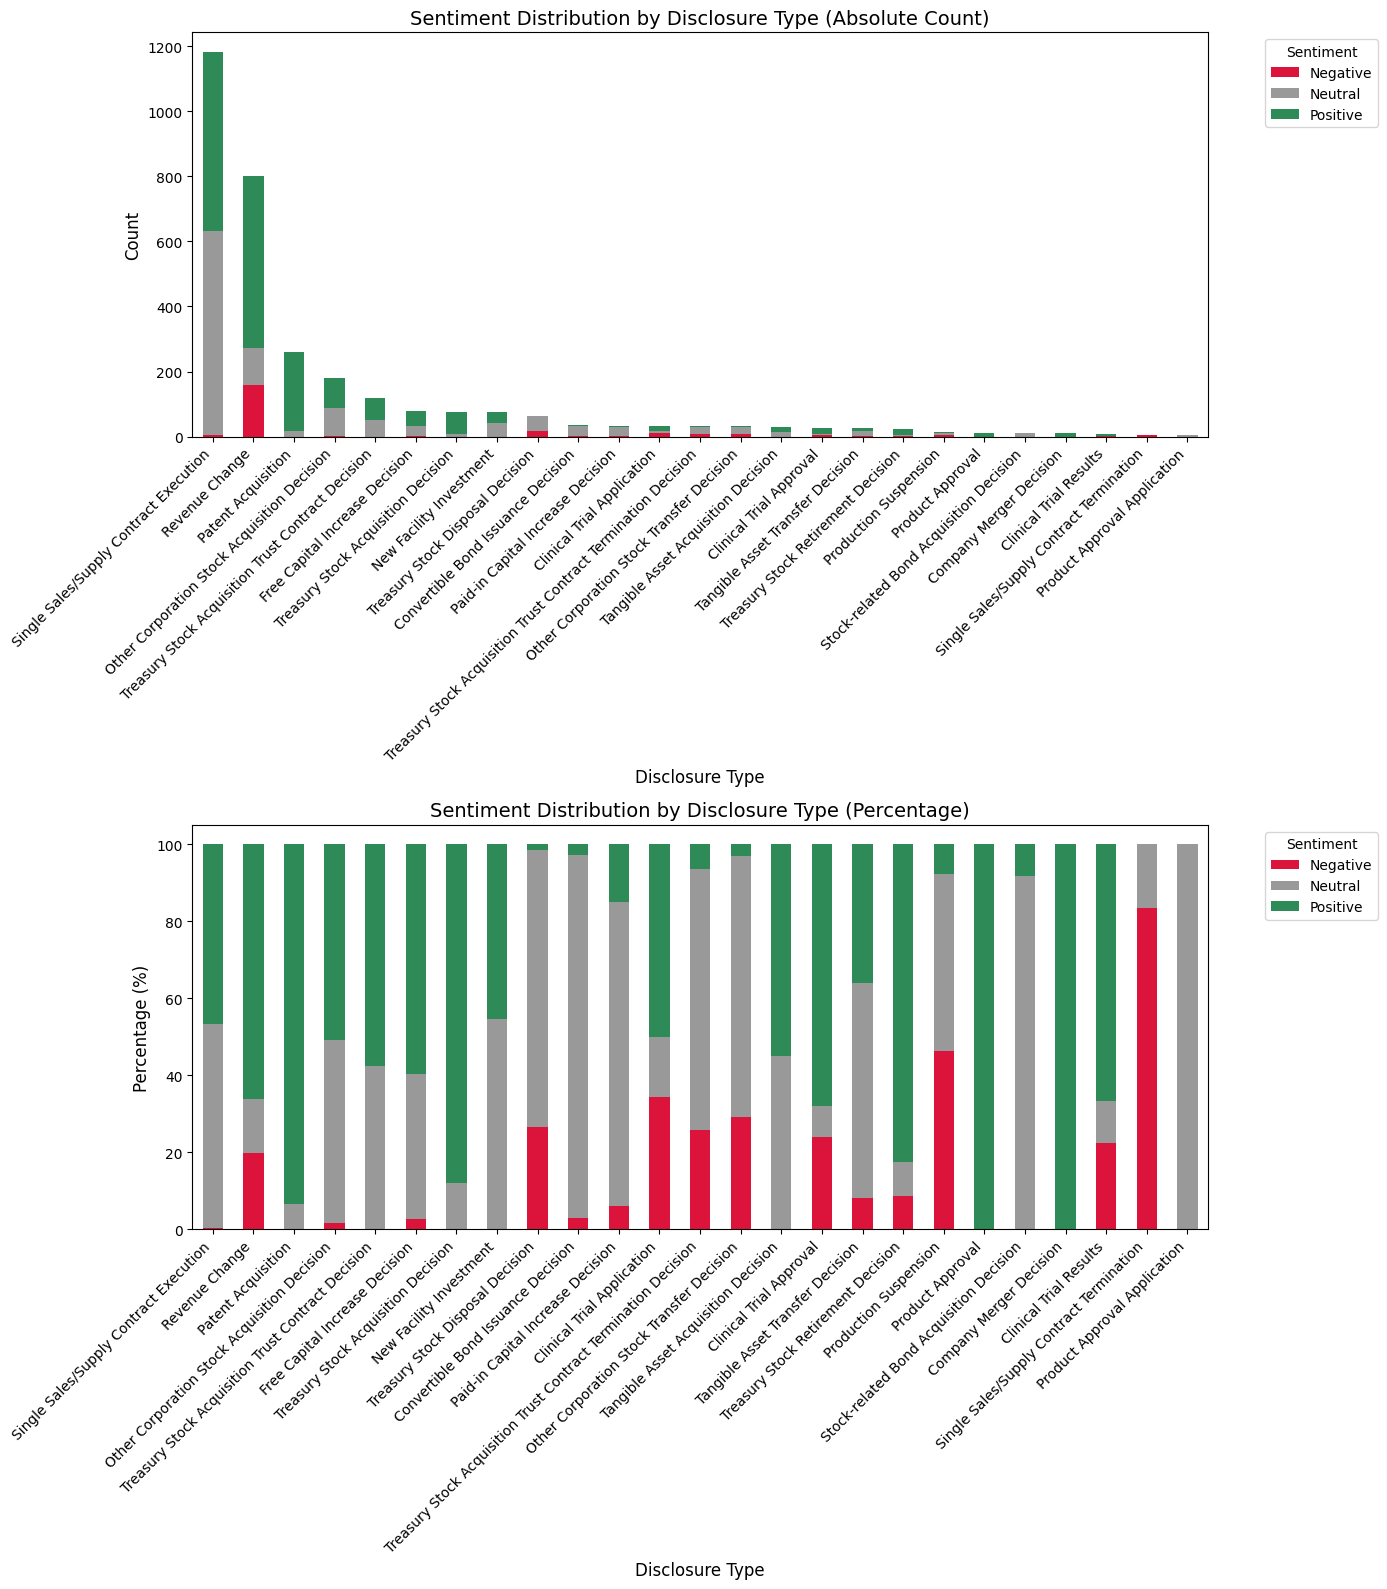

In [ ]:
# 상위 20개 공시 종류만 선택 (데이터가 많은 순서대로)
top_disclosures = df_with_returns['disclosure_type'].value_counts().head(25).index
disclosure_sentiment_top = disclosure_sentiment.loc[top_disclosures]
disclosure_sentiment_pct_top = disclosure_sentiment_pct.loc[top_disclosures]

# 색상 매핑: negative(빨강), neutral(회색), positive(초록)
sentiment_colors = {
    -1: "#DC143C", # 빨강 (negative)
     0: "#999999", # 회색 (neutral)
     1: "#2E8B57"  # 초록 (positive)
}
plot_colors = [sentiment_colors[col] for col in filtered_columns]

# 시각화 (세로 2개로 배치)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# 1. 절대 개수
disclosure_sentiment_top.plot(kind='bar', stacked=True, ax=ax1, color=plot_colors)
ax1.set_title('Sentiment Distribution by Disclosure Type (Absolute Count)', fontsize=14)
ax1.set_xlabel('Disclosure Type', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend([ 'Negative', 'Neutral', 'Positive' ], title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

x_labels = [category_mapping.get(cat, cat) for cat in top_disclosures]
ax1.set_xticklabels(x_labels, rotation=45, ha='right')

# 2. 비율(%)
disclosure_sentiment_pct_top.plot(kind='bar', stacked=True, ax=ax2, color=plot_colors)
ax2.set_title('Sentiment Distribution by Disclosure Type (Percentage)', fontsize=14)
ax2.set_xlabel('Disclosure Type', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend([ 'Negative', 'Neutral', 'Positive' ], title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_xticklabels(x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()
